<a href="https://colab.research.google.com/github/yadymilenajimenez-data/Talento-Tech-2024/blob/master/3_4_Taller_GeoJsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **TALLER**

Utilizando los conocimientos y herramientas de las lecciones anteriores, se debe cargar el geojson de los municipios en el cuaderno de jupyter y abrirlo con geopandas.

Una vez abierto guíe a los estudiantes a que, empleando Shapely:



1. Localicen su hogar y su barrio sobre el mapa (coordenadas usando geojson.io)

barrio: 2.4973469112878957, -76.57555169116988

casa 2.4971534693647204, -76.57607788735973





Dibujen empleando shapely un recuadro sobre su casa o su barrio, dibujen linestrings y polígonos para representar las carreteras de acceso cercanas y algunas de las características geográficas como pueden ser barrios, ciudades, carreteras, ríos, entre otros.
Pida a los estudiantes que una vez tengan dibujados los elementos con Python, investiguen cómo guardar la geometría en formato geojson desde geopandas
Una vez generen el archivo geojson, deberán importarlo sobre la herramienta geojson.io Pida a los estudiantes que utilizan la capa “mapa satelital” para que ellos validen si los polígonos se encuentran bien ubicados en el mapa y si representan los elementos que ellos dibujaron. En caso negativo, revise los códigos de representación tanto en geopandas como en geojson.io ya que pueden existir proyecciones diferentes a la UTM.
Finalice construyendo conclusiones de la actividad con los estudiantes.


In [ ]:
#importo librerias
!pip install mapclassify
!pip install pandas
!pip install shapely matplotlib

# Importar las bibliotecas
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp
import pandas as pd
import os
import mapclassify

In [ ]:
#permiso para acceder a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargo el archivo GeoJSON de los municipios
municipios = '/content/drive/MyDrive/geolocalizacion/TallerGeopandas/datasets/municipios.geojson'
shapes = gpd.read_file(municipios)

In [ ]:
# Localizar tu hogar y tu barrio en el mapa (usando coordenadas de geojson.io)
x_hogar = 2.4971534693647204
y_hogar = -76.57607788735973
x_barrio = 2.4973469112878957
y_barrio = -76.57555169116988
coordenadas_hogar = (x_hogar, y_hogar)  # Ingresa las coordenadas de tu hogar obtenidas de geojson.io
coordenadas_barrio = (x_barrio, y_barrio)  # Ingresa las coordenadas de tu barrio obtenidas de geojson.io


In [ ]:
# Crear un punto para representar tu hogar y tu barrio
punto_hogar = Point(coordenadas_hogar)
punto_barrio = Point(coordenadas_barrio)

In [ ]:
# Dibujar un recuadro sobre tu casa o tu barrio (ejemplo de un cuadrado)
recuadro = Polygon([(x_hogar-0.01, y_hogar-0.01), (x_hogar+0.01, y_hogar-0.01),
                    (x_hogar+0.01, y_hogar+0.01), (x_hogar-0.01, y_hogar+0.01)])

In [ ]:
# Dibujar linestrings y polígonos para representar características geográficas (ejemplo)
carretera_cercana = LineString([(x_hogar-0.01, y_hogar), (x_hogar+0.01, y_hogar)])
barrio_cercano = Polygon([(x_barrio-0.02, y_barrio-0.02), (x_barrio+0.02, y_barrio-0.02),
                          (x_barrio+0.02, y_barrio+0.02), (x_barrio-0.02, y_barrio+0.02)])

In [ ]:
# Guardar la geometría en formato GeoJSON
gdf = gpd.GeoDataFrame(geometry=[punto_hogar, punto_barrio, recuadro, carretera_cercana, barrio_cercano])
gdf.to_file("elementos_geograficos.geojson", driver='GeoJSON')

<Axes: >

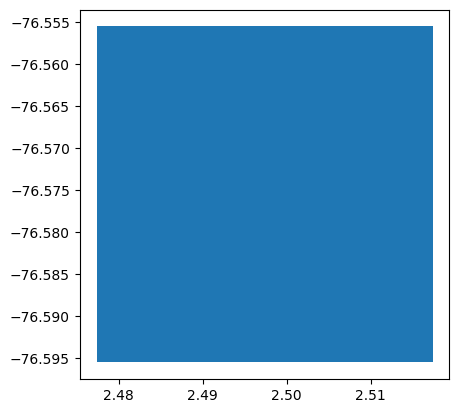

In [18]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString

# Cargo el archivo GeoJSON de los municipios
municipios = '/content/drive/MyDrive/geolocalizacion/TallerGeopandas/datasets/municipios.geojson'
shapes = gpd.read_file(municipios)

# Localizar tu hogar y tu barrio en el mapa (usando coordenadas de geojson.io)
x_hogar = 2.4971534693647204
y_hogar = -76.57607788735973
x_barrio = 2.4973469112878957
y_barrio = -76.57555169116988

coordenadas_hogar = (x_hogar, y_hogar)  # Ingresa las coordenadas de tu hogar obtenidas de geojson.io
coordenadas_barrio = (x_barrio, y_barrio)  # Ingresa las coordenadas de tu barrio obtenidas de geojson.io


# Crear un punto para representar tu hogar y tu barrio
punto_hogar = Point(coordenadas_hogar)
punto_barrio = Point(coordenadas_barrio)

# Dibujar un recuadro sobre tu casa o tu barrio (ejemplo de un cuadrado)
recuadro = Polygon([(coordenadas_hogar[0]-0.01, coordenadas_hogar[1]-0.01),
                    (coordenadas_hogar[0]+0.01, coordenadas_hogar[1]-0.01),
                    (coordenadas_hogar[0]+0.01, coordenadas_hogar[1]+0.01),
                    (coordenadas_hogar[0]-0.01, coordenadas_hogar[1]+0.01)])

# Dibujar linestrings y polígonos para representar características geográficas (ejemplo)
carretera_cercana = LineString([(coordenadas_hogar[0]-0.01, coordenadas_hogar[1]),
                                (coordenadas_hogar[0]+0.01, coordenadas_hogar[1])])
barrio_cercano = Polygon([(coordenadas_barrio[0]-0.02, coordenadas_barrio[1]-0.02),
                          (coordenadas_barrio[0]+0.02, coordenadas_barrio[1]-0.02),
                          (coordenadas_barrio[0]+0.02, coordenadas_barrio[1]+0.02),
                          (coordenadas_barrio[0]-0.02, coordenadas_barrio[1]+0.02)])

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=[punto_hogar, punto_barrio, recuadro, carretera_cercana, barrio_cercano])

# Plotear el GeoDataFrame
gdf.plot()
